## How do we do on coronavirus outbreak comparing to 2002 SARS outbreak?

Lei Fu

### Get the data

Data sets used for the analysis:
> * https://www.kaggle.com/zhongtr0n/sars-who-data
* https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

I set up start date for both epidemics based on timelines from wikipedia.

In [45]:
import csv
import io
import urllib.request

confirm = '../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
death   = "../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
recover = "../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

with open(confirm, newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')

    for i, row in enumerate(csvreader):
        # print(', '.join(row))
        
        if i == 0:
            heading = row
            print(heading)
            
            print(row[4], row[-1])
            num_days = len(row) - 4
            china_confirm = [0 for i in range(num_days)]
            rest_confirm  = [0 for i in range(num_days)]
        else:
            if row[1] == 'Mainland China':
                for j in range(num_days):
                    china_confirm[j] += int(row[j+4])
            else:
                for j in range(num_days):
                    rest_confirm[j] += int(row[j+4])
        

    print(china_confirm, rest_confirm)

['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20']
1/22/20 3/2/20
[547, 639, 916, 1399, 2062, 2863, 5494, 6070, 8124, 9783, 11871, 16607, 19693, 23680, 27409, 30553, 34075, 36778, 39790, 42306, 44327, 44699, 59832, 66292, 68347, 70446, 72364, 74139, 74546, 74999, 75472, 76922, 76938, 77152, 77660, 78065, 78498, 78824, 79251, 79826, 80026] [8, 14, 25, 35, 56, 64, 84, 96, 110, 144, 167, 180, 188, 212, 227, 265, 317, 343, 361, 457, 476, 523, 538, 595, 685, 780, 896, 999, 1095, 1200, 1371, 1677, 2047, 2418, 2755, 3332, 4258, 5298, 6762, 8545, 10287]


In [46]:
# Death
with open(death, newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    
    for i, row in enumerate(csvreader):
        # print(', '.join(row))
        
        if i == 0:
            heading = row
            print(heading)
            
            print(row[4], row[-1])
            num_days = len(row) - 4
            china_death = [0 for i in range(num_days)]
            rest_death  = [0 for i in range(num_days)]
        else:
            if row[1] == 'Mainland China':
                for j in range(num_days):
                    china_death[j] += int(row[j+4])
            else:
                for j in range(num_days):
                    rest_death[j] += int(row[j+4])
                    
    print(china_death, rest_death)
               
# Recovered
with open(recover, newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    
    for i, row in enumerate(csvreader):
        # print(', '.join(row))
        
        if i == 0:
            heading = row
            print(heading)
            
            print(row[4], row[-1])
            num_days = len(row) - 4
            china_recover = [0 for i in range(num_days)]
            rest_recover  = [0 for i in range(num_days)]
        else:
            if row[1] == 'Mainland China':
                for j in range(num_days):
                    china_recover[j] += int(row[j+4])
            else:
                for j in range(num_days):
                    rest_recover[j] += int(row[j+4])
                    
    print(china_recover, rest_recover)
    
date = heading[4:]

['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20']
1/22/20 3/2/20
[17, 18, 26, 42, 56, 82, 131, 133, 171, 213, 259, 361, 425, 490, 562, 632, 717, 804, 904, 1011, 1111, 1116, 1368, 1520, 1662, 1765, 1863, 2002, 2114, 2236, 2236, 2441, 2443, 2593, 2663, 2715, 2744, 2788, 2835, 2870, 2912] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 5, 5, 5, 8, 11, 15, 17, 26, 36, 45, 55, 70, 84, 106, 126, 173]
['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/

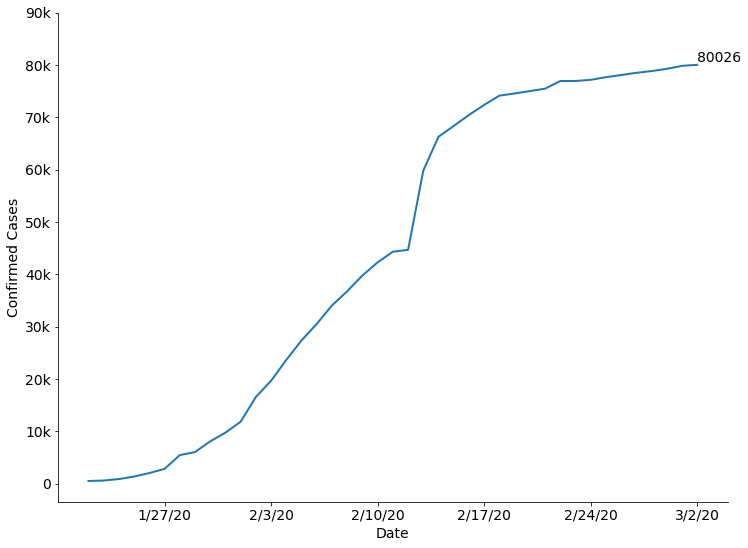

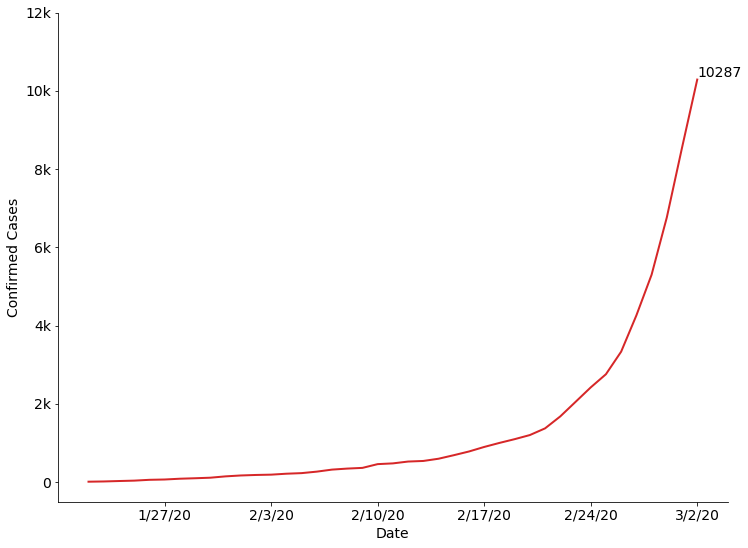

In [47]:
import matplotlib.pyplot as plt

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)
    
def my_plot(x, y, fig_size=(12, 9), x_label='', y_label='', color='blue', step=1):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.plot(x, y, lw=2, color=color)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.xticks(x[::-7], fontsize=14)    
    plt.text(x[-1], y[-1], "%d" %y[-1], va="bottom", ha="left", fontsize=14)
    step = 10 ** (len(str(max(y))) - 1)
    if max(y) < 2*step:
        step = step // 5
    max_val = max(y)//step*step+step+1

    if step < 1000:
        thousand = ""
        stride = step
    else:
        thousand = 'k' # str(step//1000)[1:] + "k"
        stride = step // 1000
    plt.yticks(range(0, max_val, step), ['0']+[str(x)+thousand for x in range(stride, max_val, stride)], fontsize=14)
    
    # Remove the plot frame lines. They are unnecessary chartjunk.  
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    return ax

    #plt.show()
    
    
my_plot(heading[4:], china_confirm, x_label='Date', y_label='Confirmed Cases', color=tableau20[0])
plt.show()

my_plot(heading[4:], rest_confirm, x_label='Date', y_label='Confirmed Cases', color=tableau20[6], step=1000)
#plt.yticks(range(0, max(rest_confirm)//1000*1000+1001, 1000), [0]+[str(x) + "k" for x in range(1, max(rest_confirm)//1000+2, 1)], fontsize=14)
#plt.text(heading[-2], rest_confirm[-2], "%d" %rest_confirm[-2], va="bottom", ha="right", fontsize=14)
#plt.text(heading[-3], rest_confirm[-3], "%d" %rest_confirm[-3], va="bottom", ha="right", fontsize=14)
plt.show()

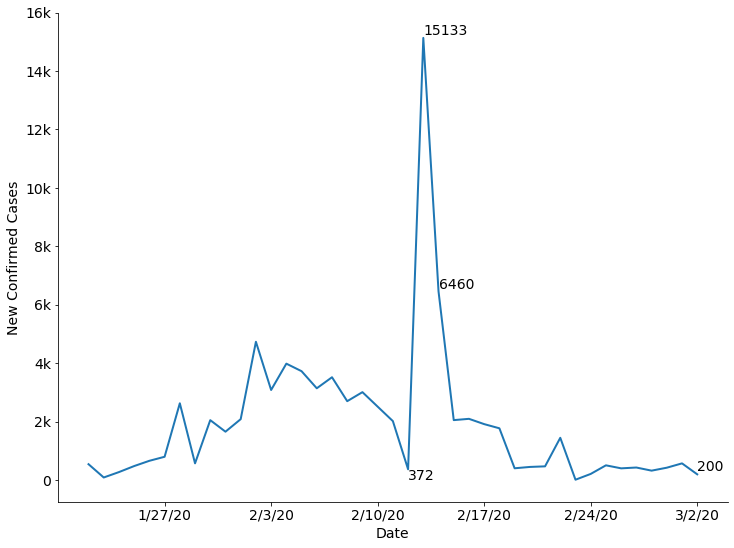

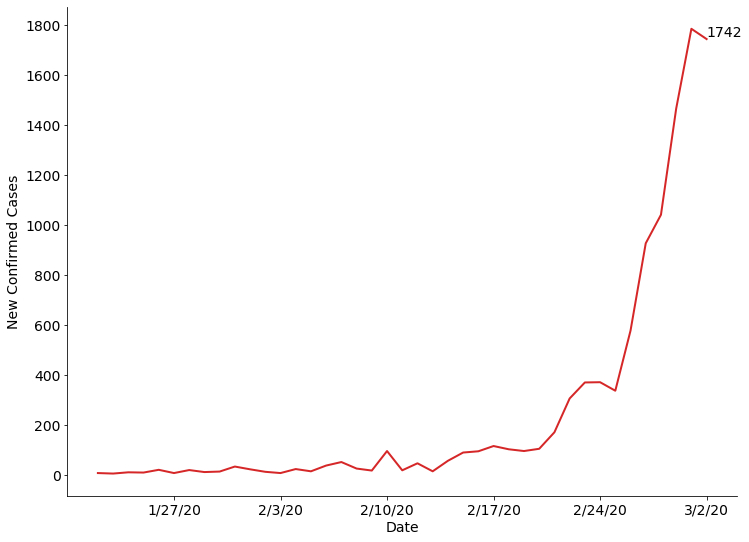

In [48]:
china_confirm_daily = [china_confirm[0]] + [china_confirm[i+1]-china_confirm[i] for i in range(len(china_confirm)-1)]
rest_confirm_daily = [rest_confirm[0]] + [rest_confirm[i+1]-rest_confirm[i] for i in range(len(rest_confirm)-1)]

my_plot(heading[4:], china_confirm_daily, x_label='Date', y_label='New Confirmed Cases', color=tableau20[0])
#plt.yticks(range(0, max(china_confirm_daily)//2000*2000+2001, 2000), [0]+[str(x) + "k" for x in range(2, max(china_confirm_daily)//2000+3, 2)], fontsize=14)
plt.text(heading[21+4], china_confirm_daily[21], "%d" %china_confirm_daily[21], va="top", ha="left", fontsize=14)
plt.text(heading[22+4], china_confirm_daily[22], "%d" %china_confirm_daily[22], va="bottom", ha="left", fontsize=14)
plt.text(heading[23+4], china_confirm_daily[23], "%d" %china_confirm_daily[23], va="bottom", ha="left", fontsize=14)
plt.show()

my_plot(heading[4:], rest_confirm_daily, x_label='Date', y_label='New Confirmed Cases', color=tableau20[6])
plt.show()

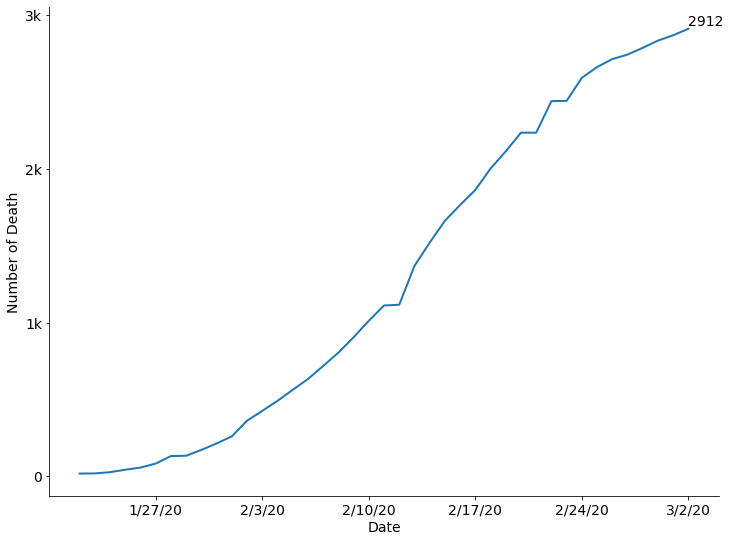

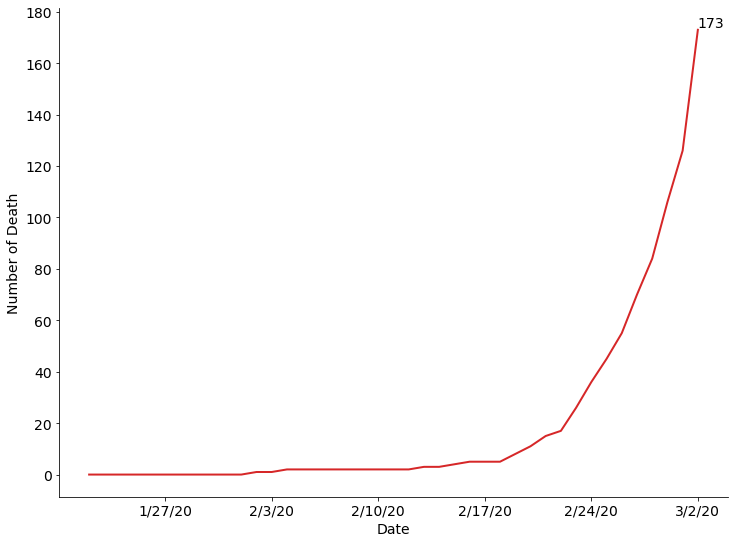

In [49]:
# Death
my_plot(heading[4:], china_death, x_label='Date', y_label='Number of Death', color=tableau20[0])
plt.show()

my_plot(heading[4:], rest_death, x_label='Date', y_label='Number of Death', color=tableau20[6])
plt.show()

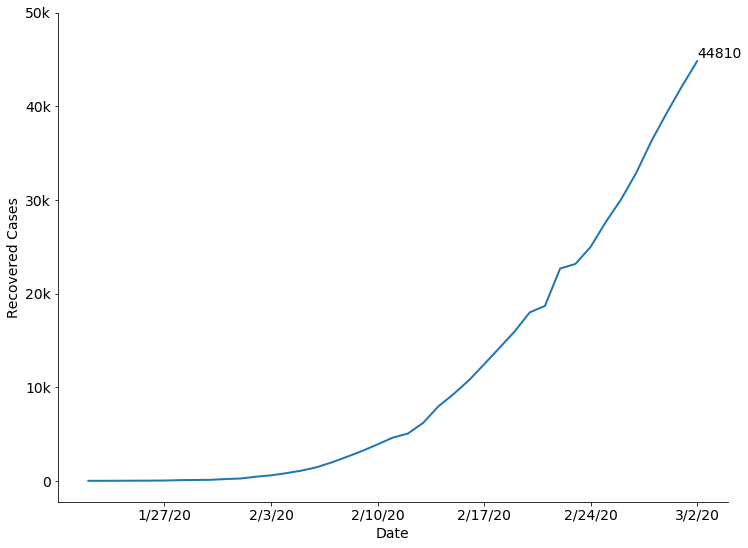

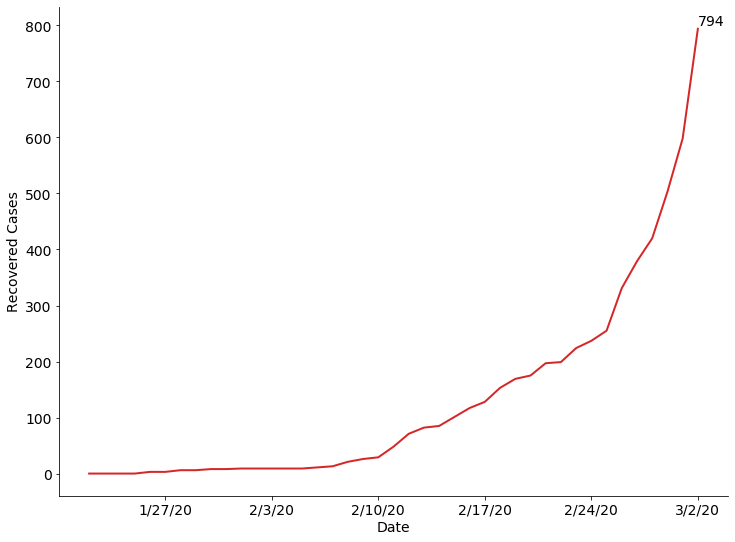

In [50]:
# Recovered
my_plot(heading[4:], china_recover, x_label='Date', y_label='Recovered Cases', color=tableau20[0])

my_plot(heading[4:], rest_recover, x_label='Date', y_label='Recovered Cases', color=tableau20[6])

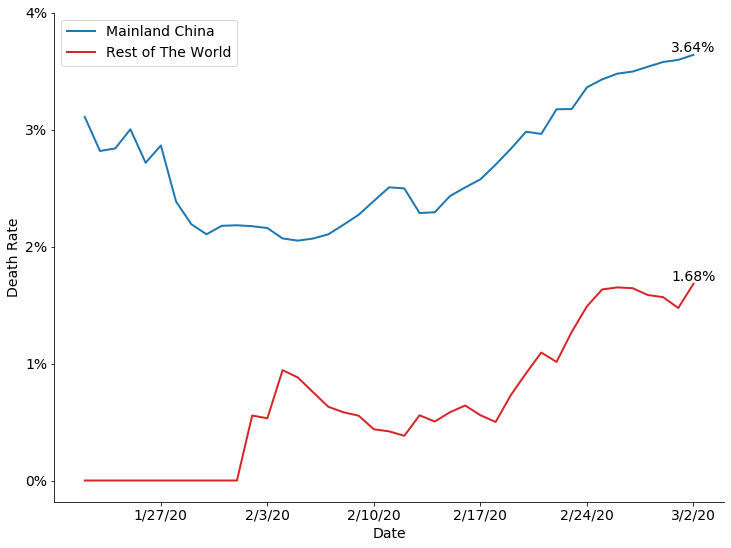

In [51]:
# Death rate
china_death_rate = [float(china_death[i])/float(china_confirm[i]) for i in range(len(china_recover))]
rest_death_rate  = [float(rest_death[i])/float(rest_confirm[i]) for i in range(len(rest_recover))]

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(date, china_death_rate, lw=2, label="Mainland China")
plt.xlabel('Date', fontsize=14)
plt.ylabel('Death Rate', fontsize=14)
plt.text(num_days-1, china_death_rate[-1], "%.2f%s" %(china_death_rate[-1]*100, "%"), va="bottom", ha="center", fontsize=14)

ax.plot(date, rest_death_rate, lw=2, color=tableau20[6], label="Rest of The World")
plt.xlabel('Date', fontsize=14)
plt.ylabel('Death Rate', fontsize=14)
plt.xticks(date[::-7], fontsize=14)    
plt.yticks([i/100 for i in range(0, 5, 1)], [str(x) + "%" for x in range(0, 5, 1)], fontsize=14)
plt.text(num_days-1, rest_death_rate[-1], "%.2f%s" %(rest_death_rate[-1]*100, "%"), va="bottom", ha="center", fontsize=14)
plt.legend(loc='upper left', prop={'size':14})

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.show()

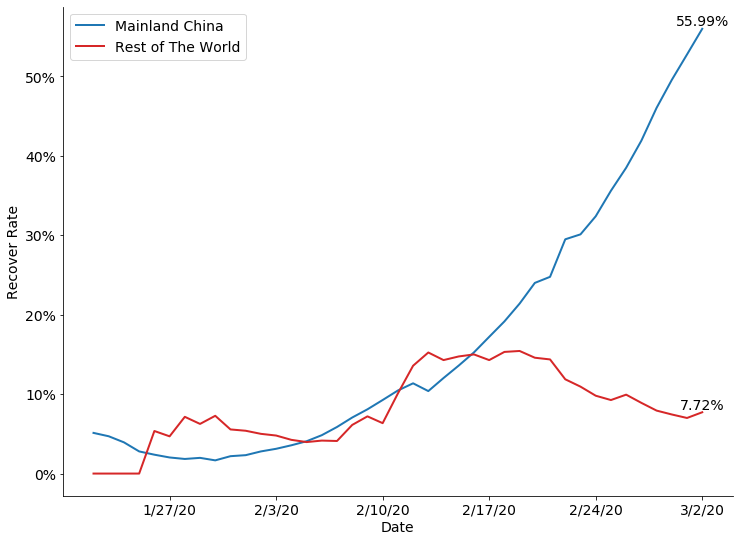

In [52]:
# Recovered rate
china_recover_rate = [float(china_recover[i])/float(china_confirm[i]) for i in range(len(china_recover))]
rest_recover_rate  = [float(rest_recover[i])/float(rest_confirm[i]) for i in range(len(rest_recover))]

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(date, china_recover_rate, lw=2, color=tableau20[0], label='Mainland China')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Recover Rate', fontsize=14)
plt.text(num_days-1, china_recover_rate[-1], "%.2f%s" %(china_recover_rate[-1]*100, "%"), va="bottom", ha="center", fontsize=14)

ax.plot(date, rest_recover_rate, lw=2, color=tableau20[6], label="Rest of The World")
plt.xlabel('Date', fontsize=14)
plt.ylabel('Recover Rate', fontsize=14)
plt.xticks(date[::-7], fontsize=14)    
plt.yticks([i/100 for i in range(0, 51, 10)], [str(x) + "%" for x in range(0, 51, 10)], fontsize=14)
plt.text(num_days-1, rest_recover_rate[-1], "%.2f%s" %(rest_recover_rate[-1]*100, "%"), va="bottom", ha="center", fontsize=14)

plt.legend(loc='upper left', prop={'size':14})

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.show()

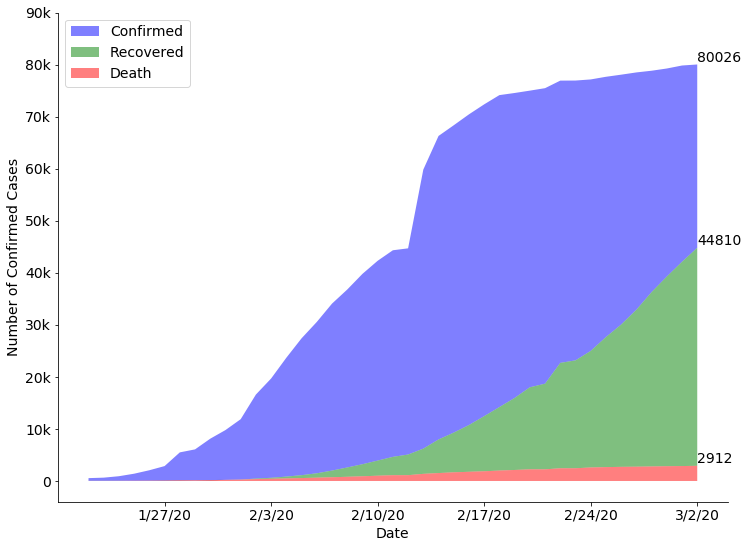

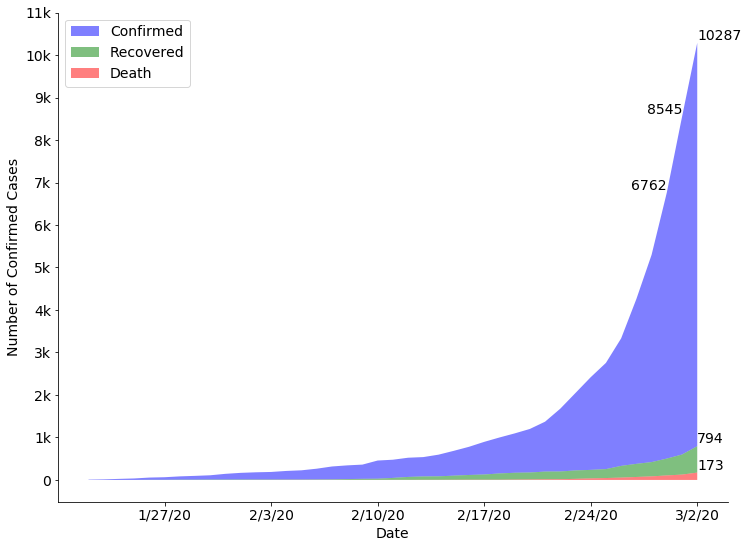

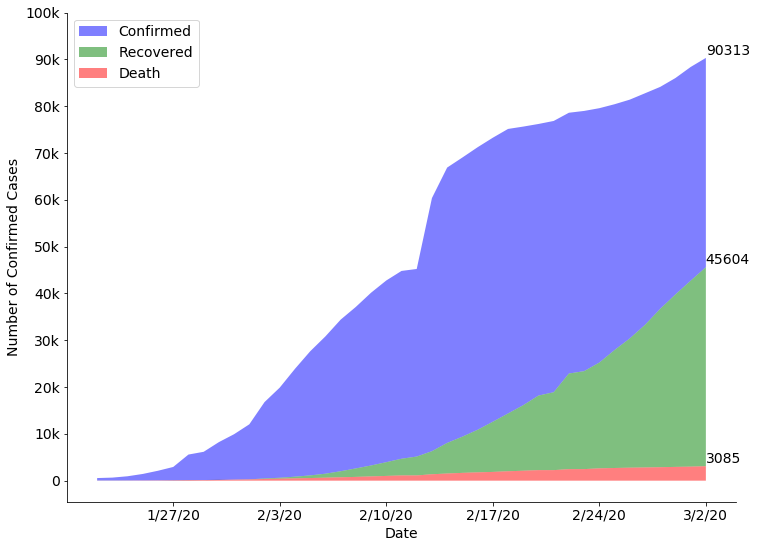

In [53]:
# Filling
fig, ax = plt.subplots(figsize=(12, 9))
ax.fill_between(heading[4:], china_confirm, china_recover, facecolor='blue', alpha=0.5, label='Confirmed')
ax.fill_between(heading[4:], china_recover, china_death, facecolor='green', alpha=0.5, label='Recovered')
ax.fill_between(heading[4:], china_death, facecolor='red', alpha=0.5, label='Death')

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 

plt.legend(loc='upper left', prop={'size':14})
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Confirmed Cases', fontsize=14)
plt.xticks(heading[:4:-7], fontsize=14)    
plt.yticks(range(0, max(china_confirm)//10000*10000+10001, 10000), ['0']+[str(x) + "k" for x in range(10, max(china_confirm)//1000+11, 10)], fontsize=14)
plt.text(num_days-1, china_confirm[-1], "%d" %china_confirm[-1], va="bottom", ha="left", fontsize=14)
plt.text(num_days-1, china_recover[-1], "%d" %china_recover[-1], va="bottom", ha="left", fontsize=14)
plt.text(num_days-1, china_death[-1], "%d" %china_death[-1], va="bottom", ha="left", fontsize=14)
plt.show()

# Rest world
fig, ax = plt.subplots(figsize=(12, 9))  
plt.fill_between(heading[4:], rest_confirm, rest_recover, facecolor='blue', alpha=0.5, label='Confirmed')
plt.fill_between(heading[4:], rest_recover, rest_death, facecolor='green', alpha=0.5, label='Recovered')
plt.fill_between(heading[4:], rest_death, facecolor='red', alpha=0.5, label='Death')

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.legend(loc='upper left', prop={'size':14})
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Confirmed Cases', fontsize=14)
plt.xticks(heading[:4:-7], fontsize=14)    
plt.yticks(range(0, max(rest_confirm)//1000*1000+1001, 1000), [0]+[str(x) + "k" for x in range(1, max(rest_confirm)//1000+2, 1)], fontsize=14)  
plt.text(num_days-1, rest_confirm[-1], "%d" %rest_confirm[-1], va="bottom", ha="left", fontsize=14)
plt.text(num_days-2, rest_confirm[-2], "%d" %rest_confirm[-2], va="bottom", ha="right", fontsize=14)
plt.text(num_days-3, rest_confirm[-3], "%d" %rest_confirm[-3], va="bottom", ha="right", fontsize=14)

plt.text(num_days-1, rest_recover[-1], "%d" %rest_recover[-1], va="bottom", ha="left", fontsize=14)
plt.text(num_days-1, rest_death[-1], "%d" %rest_death[-1], va="bottom", ha="left", fontsize=14)
plt.show()


# All
all_confirm =  [china_confirm[i]+rest_confirm[i] for i in range(len(china_confirm))]
all_recover =  [china_recover[i]+rest_recover[i] for i in range(len(china_recover))]
all_death = [china_death[i]+rest_death[i] for i in range(len(china_death))]

fig, ax = plt.subplots(figsize=(12, 9))  
plt.fill_between(heading[4:], all_confirm, all_recover, facecolor='blue', alpha=0.5, label='Confirmed')
plt.fill_between(heading[4:], all_recover, all_death, facecolor='green', alpha=0.5, label='Recovered')
plt.fill_between(heading[4:], all_death, facecolor='red', alpha=0.5, label='Death')

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.legend(loc='upper left', prop={'size':14})
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Confirmed Cases', fontsize=14)
plt.xticks(heading[:4:-7], fontsize=14)    
plt.yticks(range(0, max(all_confirm)//10000*10000+10001, 10000), ['0']+[str(x) + "k" for x in range(10, max(all_confirm)//1000+11, 10)], fontsize=14)
plt.text(num_days-1, all_confirm[-1], "%d" %all_confirm[-1], va="bottom", ha="left", fontsize=14)
plt.text(num_days-1, all_recover[-1], "%d" %all_recover[-1], va="bottom", ha="left", fontsize=14)
plt.text(num_days-1, all_death[-1], "%d" %all_death[-1], va="bottom", ha="left", fontsize=14)
plt.show()

### Comparison of outbreak dynamics

\*I add day 0 to data set for better plottig. With line plot it falsifies picture a little bit (linear interpolation), but it does not matter for the overall outcome.

By looking at the plot below you can instantly see that the current outbreak is much bigger than SARS was, but for now it is hard to say how the curve will evolve in the future.

['', 'Date', 'Infected', 'Mortality', 'URL']
date: 07/11/03, confirm: 8437, death: 813, ndays: 117
test


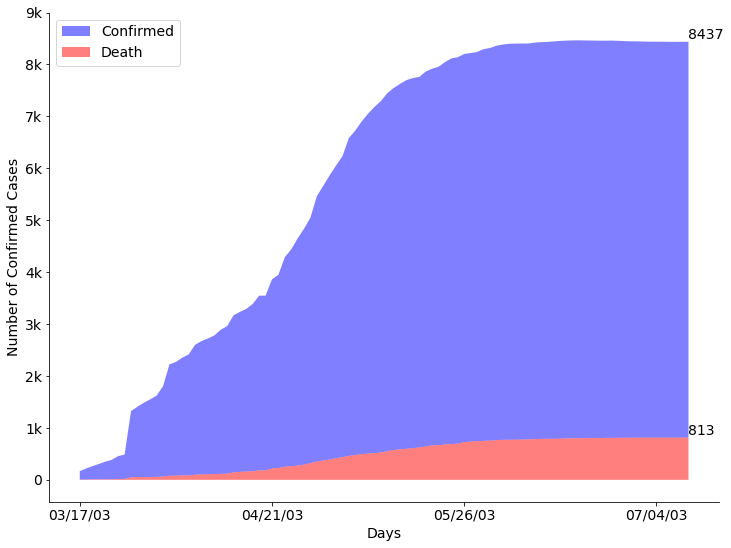

In [54]:
from datetime import date

# SARS
sars_csv = "data/sars-who-data/sars_final.csv"

class sars_data:

    def __init__(self, date, confirm, death, ndays):
        self.date = date
        self.confirm = confirm
        self.death = death
        self.ndays = ndays

sars = []
    
with open(sars_csv, newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    
    for i, row in enumerate(csvreader):
        # print(', '.join(row))
        
        if i == 0:
            heading2 = row
            print(heading2)     
        else:
            x = row[1].replace(' ', '-').split('-')
            x = [int(item) for item in x[:3]]
            d = date(x[0], x[1], x[2])
            d2 = d.strftime("%m/%d/%y")
            if sars:
                d_days = (d - date_start).days + 1
            else:
                date_start = d
                d_days = 1
            data = sars_data(d2, int(row[2]), int(row[3]), d_days) 
            sars.append(data)
            
    attrs = vars(sars[-1])
    print(', '.join("%s: %s" % item for item in attrs.items()))

sars_date = [x.date for x in sars]
sars_days = [x.ndays for x in sars]
sars_confirm = [x.confirm for x in sars]
sars_death = [x.death for x in sars]

# Filling
fig, ax = plt.subplots(figsize=(12, 9))
ax.fill_between(sars_date, sars_confirm, sars_death, facecolor='blue', alpha=0.5, label='Confirmed')
ax.fill_between(sars_date, sars_death, facecolor='red', alpha=0.5, label='Death')

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 

plt.legend(loc='upper left', prop={'size':14})
plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of Confirmed Cases', fontsize=14)
plt.xticks(sars_date[::30], fontsize=14)
print("test")
plt.yticks(range(0, max(sars_confirm)//1000*1000+1001, 1000), ['0']+[str(x) + "k" for x in range(1, max(sars_confirm)//1000+2, 1)], fontsize=14)
plt.text(sars_date[-1], sars_confirm[-1], "%d" %sars_confirm[-1], va="bottom", ha="left", fontsize=14)
plt.text(sars_date[-1], sars_death[-1], "%d" %sars_death[-1], va="bottom", ha="left", fontsize=14)
plt.show()

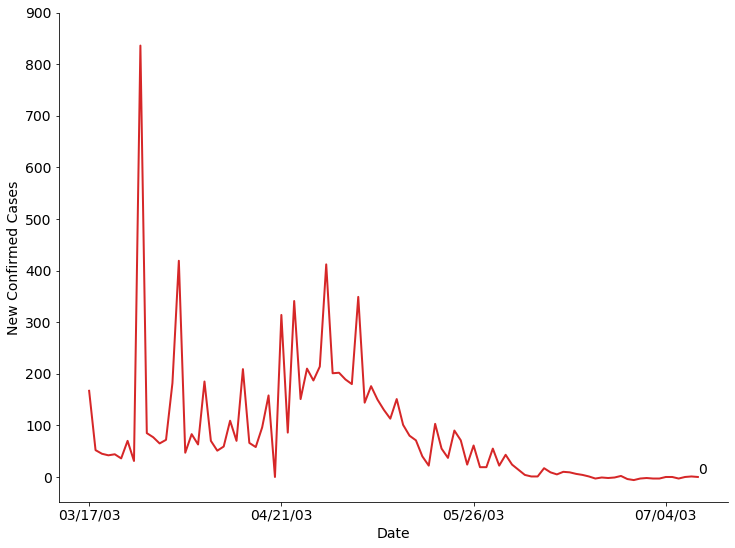

In [55]:
# Daily
sars_confirm_daily = [sars_confirm[0]] + [sars_confirm[i+1]-sars_confirm[i] for i in range(len(sars_confirm)-1)]

my_plot(sars_date, sars_confirm_daily, x_label='Date', y_label='New Confirmed Cases', color=tableau20[6])
plt.xticks(sars_date[::30], fontsize=14)    
plt.show()

### Mortality rate estimation

Novel coronavirus is said to be less deadly then SARS (2-3% vs 9.5% mortality rate), but is that so? Early estimates of mortality rate are influenced (among others) by:
* changes in outbreak dynamics (due to rise of disease awernes, virus evolution etc.)
* lag between diagnosis and death

Let's have a look on how the rate evolved for both outbreaks over time. Notice, that reported in media 2-3% estimate comes from calculation without any lag (blue line) and that for SARS at early stage it was just slightly bit higher than for 2019-nCoV. **Thus I expect current outbreak mortality rate to rise to somwhere between 6% and 10% finally.**

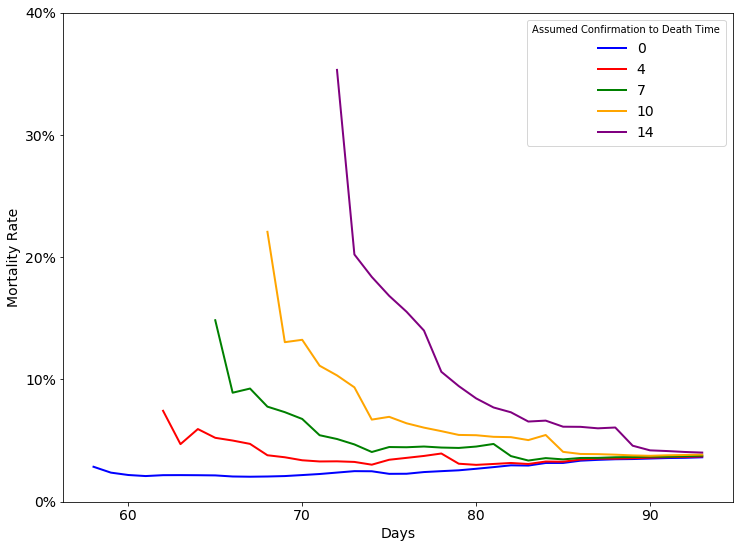

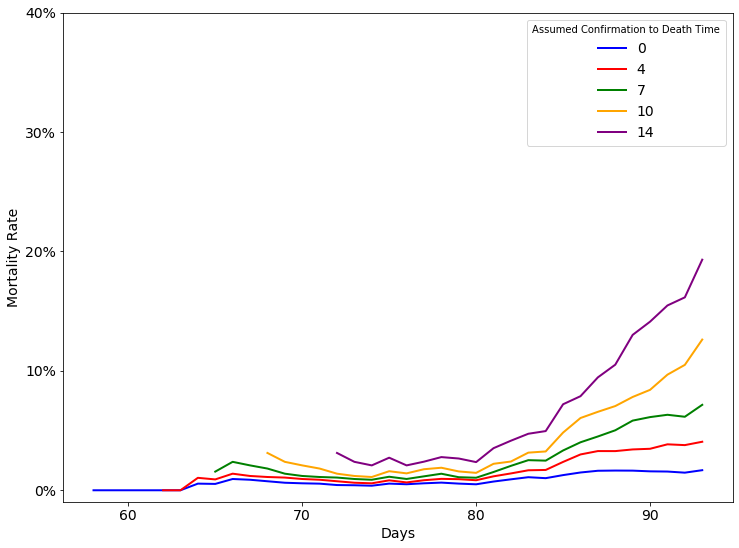

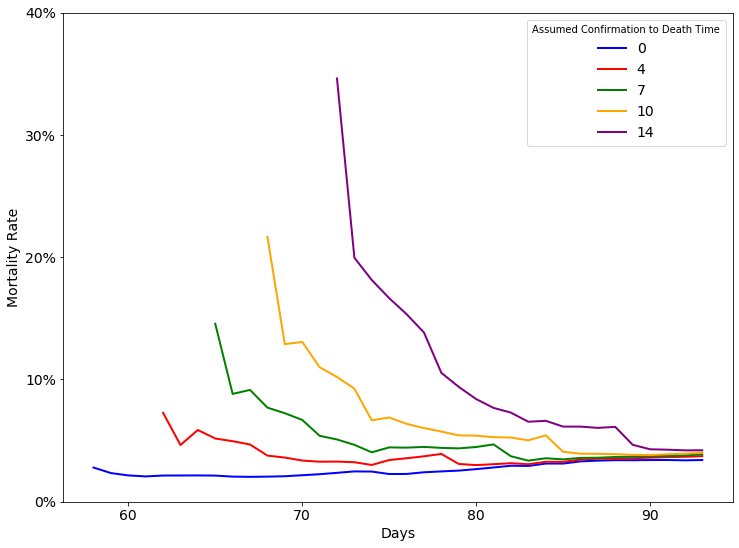

In [56]:
# China Mortality rate
lag = [0, 4, 7, 10, 14]
mortality_rate = [[0 for j in range(num_days)] for i in range(len(lag))]

for i, dt in enumerate(lag):
    for j in range(num_days):
        if j-dt >= 0:
            mortality_rate[i][j] = float(china_death[j]) / float(china_confirm[j-dt])

fig, ax = plt.subplots(figsize=(12, 9))
plt.xlabel('Days', fontsize=14)
plt.ylabel('Mortality Rate', fontsize=14)
pcolor=['blue', 'red', 'green', 'orange', 'purple']
for i,dt in enumerate(lag):
    ax.plot(heading[4+dt+5:], mortality_rate[i][dt+5:], lw=2, color=pcolor[i], label=str(dt))
    # plt.text(num_days-1, mortality_rate[i][-1], "%.2f%s" %(mortality_rate[i][-1]*100, "%"), va="bottom", ha="center", fontsize=14)

start_days = 31+22+5 # start 12/01/2019, report start 02/22/2020, lag 14 days
report_days = len(heading[4+7:])
plt.xticks(heading[4+7::10], [i for i in range(start_days+2, start_days+report_days+3, 10)], fontsize=14)    
plt.yticks([i/100.0 for i in range(0, 41, 10)], [str(x)+'%' for x in range(0, 41, 10)], fontsize=14)
plt.legend(loc='upper right', prop={'size':14}, title="Assumed Confirmation to Death Time")

plt.show()

# Rest World Mortality rate
lag = [0, 4, 7, 10, 14]
mortality_rate = [[0 for j in range(num_days)] for i in range(len(lag))]

for i, dt in enumerate(lag):
    for j in range(num_days):
        if j-dt >= 0:
            mortality_rate[i][j] = float(rest_death[j]) / float(rest_confirm[j-dt])

fig, ax = plt.subplots(figsize=(12, 9))
plt.xlabel('Days', fontsize=14)
plt.ylabel('Mortality Rate', fontsize=14)
pcolor=['blue', 'red', 'green', 'orange', 'purple']
for i,dt in enumerate(lag):
    ax.plot(heading[4+dt+5:], mortality_rate[i][dt+5:], lw=2, color=pcolor[i], label=str(dt))
    # plt.text(num_days-1, mortality_rate[i][-1], "%.2f%s" %(mortality_rate[i][-1]*100, "%"), va="bottom", ha="center", fontsize=14)

start_days = 31+22+5 # start 12/01/2019, report start 02/22/2020, lag 14 days
report_days = len(heading[4+7:])
plt.xticks(heading[4+7::10], [i for i in range(start_days+2, start_days+report_days+3, 10)], fontsize=14)    
plt.yticks([i/100.0 for i in range(0, 41, 10)], [str(x)+'%' for x in range(0, 41, 10)], fontsize=14)
plt.legend(loc='upper right', prop={'size':14}, title="Assumed Confirmation to Death Time")

plt.show()

# Mortality rate
lag = [0, 4, 7, 10, 14]
mortality_rate = [[0 for j in range(num_days)] for i in range(len(lag))]

for i, dt in enumerate(lag):
    for j in range(num_days):
        if j-dt >= 0:
            mortality_rate[i][j] = float(china_death[j] + rest_death[j]) / float(china_confirm[j-dt] + rest_confirm[j-dt])

fig, ax = plt.subplots(figsize=(12, 9))
plt.xlabel('Days', fontsize=14)
plt.ylabel('Mortality Rate', fontsize=14)
pcolor=['blue', 'red', 'green', 'orange', 'purple']
for i,dt in enumerate(lag):
    ax.plot(heading[4+dt+5:], mortality_rate[i][dt+5:], lw=2, color=pcolor[i], label=str(dt))
    # plt.text(num_days-1, mortality_rate[i][-1], "%.2f%s" %(mortality_rate[i][-1]*100, "%"), va="bottom", ha="center", fontsize=14)

start_days = 31+22+5 # start 12/01/2019, report start 02/22/2020, lag 14 days
report_days = len(heading[4+7:])
plt.xticks(heading[4+7::10], [i for i in range(start_days+2, start_days+report_days+3, 10)], fontsize=14)    
plt.yticks([i/100.0 for i in range(0, 41, 10)], [str(x)+'%' for x in range(0, 41, 10)], fontsize=14)
plt.legend(loc='upper right', prop={'size':14}, title="Assumed Confirmation to Death Time")

plt.show()

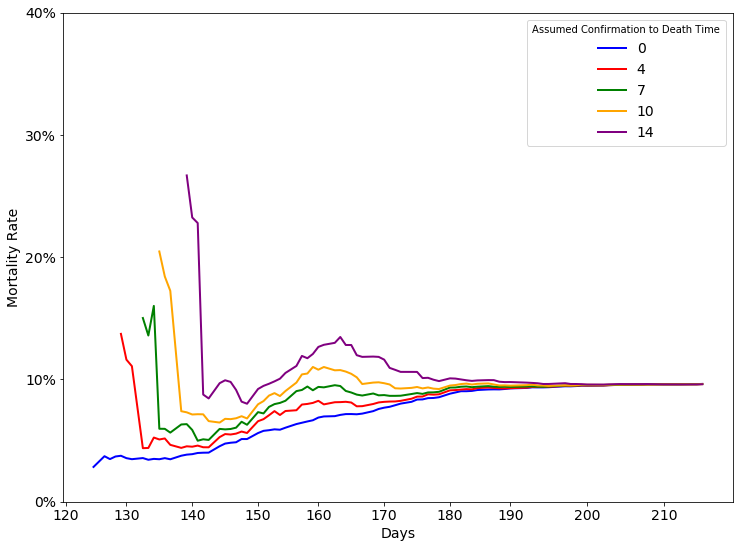

In [57]:
# SARS Mortality rate
sars_mortality_rate = [[0 for j in range(len(sars_days))] for i in range(len(lag))]

for i, dt in enumerate(lag):
    for j in range(len(sars_days)):
        if j-dt >= 0:
            sars_mortality_rate[i][j] = float(sars_death[j]) / float(sars_confirm[j-dt])

fig, ax = plt.subplots(figsize=(12, 9))
plt.xlabel('Days', fontsize=14)
plt.ylabel('Mortality Rate', fontsize=14)
pcolor=['blue', 'red', 'green', 'orange', 'purple']
for i,dt in enumerate(lag):
    ax.plot(sars_days[dt+5:], sars_mortality_rate[i][dt+5:], lw=2, color=pcolor[i], label=str(dt))
    # plt.text(num_days-1, mortality_rate[i][-1], "%.2f%s" %(mortality_rate[i][-1]*100, "%"), va="bottom", ha="center", fontsize=14)

start_days = 120 # start 11/16/2002, first record 03/17/2003
report_days = len(sars_days[0:])
plt.xticks(sars_days[::10], [i for i in range(start_days, start_days+report_days+1, 10)], fontsize=14)    
plt.yticks([i/100.0 for i in range(0, 41, 10)], [str(x)+'%' for x in range(0, 41, 10)], fontsize=14)
plt.legend(loc='upper right', prop={'size':14}, title="Assumed Confirmation to Death Time")

plt.show()